# Replication assignment

Replicate the results found in Bryant et al  (2010), Rozenberg et al (2014), and Hamarat et al (2013). The data files are named accordingly. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for this week. You can also look at Kwakkel & Jaxa-Rozen (2016), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 




In [11]:
import pandas as pd
 
data = pd.DataFrame.from_csv('data/Bryant et al 2010.csv')#, index_col=False)
x = data.ix[:, 2:11]
y = data.ix[:, 14]

In [15]:
data

,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
renew req %,,,,,,,,,,,,,,,
0.25,1,124.900001,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0
0.25,1,90.000000,689.799988,0.22,94.400002,0.256,-0.790,1.82,0.066,174.899994,1007,5.49,119.86,1,0
0.25,1,85.199997,500.600006,0.07,90.599998,0.293,-0.711,0.59,-0.018,114.199997,1008,16.83,157.92,0,0
0.25,1,106.099999,639.200012,0.28,90.800003,0.232,-0.378,1.86,-0.052,111.599999,1009,51.47,188.45,0,0
0.25,1,89.500000,802.000000,0.21,94.400002,0.402,-0.555,1.77,-0.015,141.500000,1010,20.71,116.71,0,0


In [14]:
x = x.to_records()
y = y.values

In [20]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

In [21]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 0.9555555555555556, mass: 0.05102040816326531, coverage: 0.48314606741573035, density: 0.9555555555555556 restricted_dimensions: 4.0


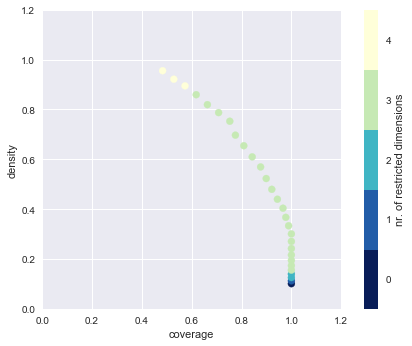

In [22]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

coverage    0.752809
density     0.752809
mass        0.100907
mean        0.752809
res dim     3.000000
Name: 21, dtype: float64

                            box 21                          
                               min         max     qp values
Demand elasticity        -0.422000   -0.202000  4.957094e-17
Biomass backstop price  155.550003  199.600006  5.511301e-13
Total biomass           450.000000  776.699982  9.770371e-06



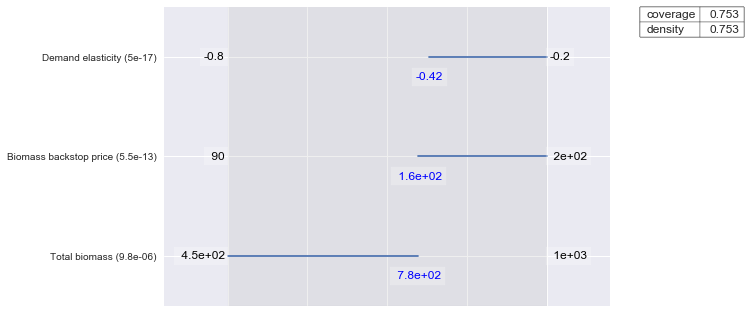

In [26]:
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

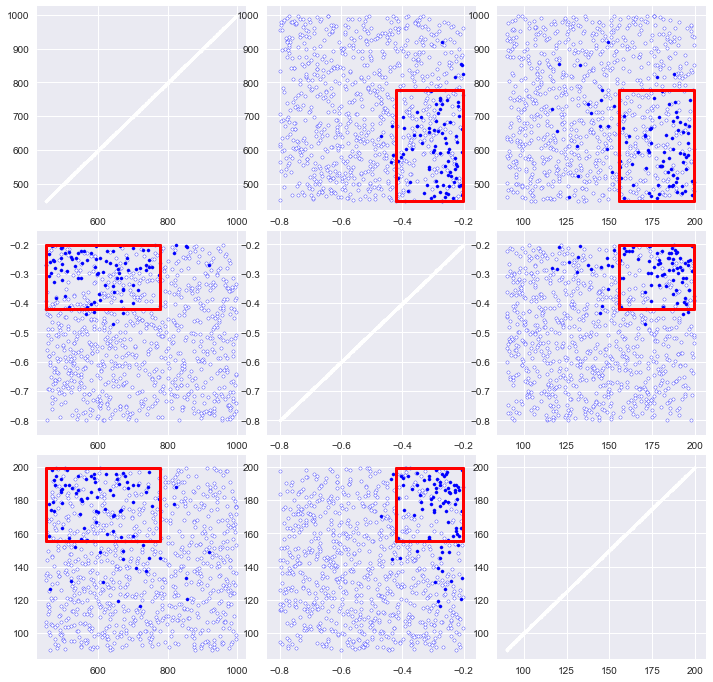

In [25]:
box1.select(21)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

In [27]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 793 points remaining, containing 22 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.2978723404255319, returning dump box


In [31]:
print (prim_alg.stats_to_dataframe())
print (prim_alg.boxes_to_dataframe())

       coverage   density      mass  res_dim
box 1  0.752809  0.752809  0.100907      3.0
box 2  0.247191  0.027743  0.899093      0.0
                             box 1              box 2            
                               min         max    min         max
Demand elasticity        -0.422000   -0.202000   -0.8   -0.202000
Biomass backstop price  155.550003  199.600006   90.0  199.600006
Total biomass           450.000000  776.699982  450.0  997.799988


In [39]:
from ema_workbench.analysis import cart
cart_alg = cart.CART(x,y, 0.05)
cart_alg.build_tree()

In [33]:
print (cart_alg.stats_to_dataframe())
print (cart_alg.boxes_to_dataframe())

       coverage   density      mass  res dim
box 1  0.011236  0.021739  0.052154        2
box 2  0.000000  0.000000  0.546485        2
box 3  0.000000  0.000000  0.103175        2
box 4  0.044944  0.090909  0.049887        2
box 5  0.224719  0.434783  0.052154        2
box 6  0.112360  0.227273  0.049887        3
box 7  0.000000  0.000000  0.051020        3
box 8  0.606742  0.642857  0.095238        2
                       box 1                  box 2               box 3  \
                         min         max        min         max     min   
Cellulosic yield        80.0   81.649994  81.649994   99.900002  80.000   
Demand elasticity       -0.8   -0.439000  -0.800000   -0.439000  -0.439   
Biomass backstop price  90.0  199.600006  90.000000  199.600006  90.000   

                                         box 4                box 5  \
                               max         min         max      min   
Cellulosic yield         99.900002   80.000000   99.900002   80.000   
Demand

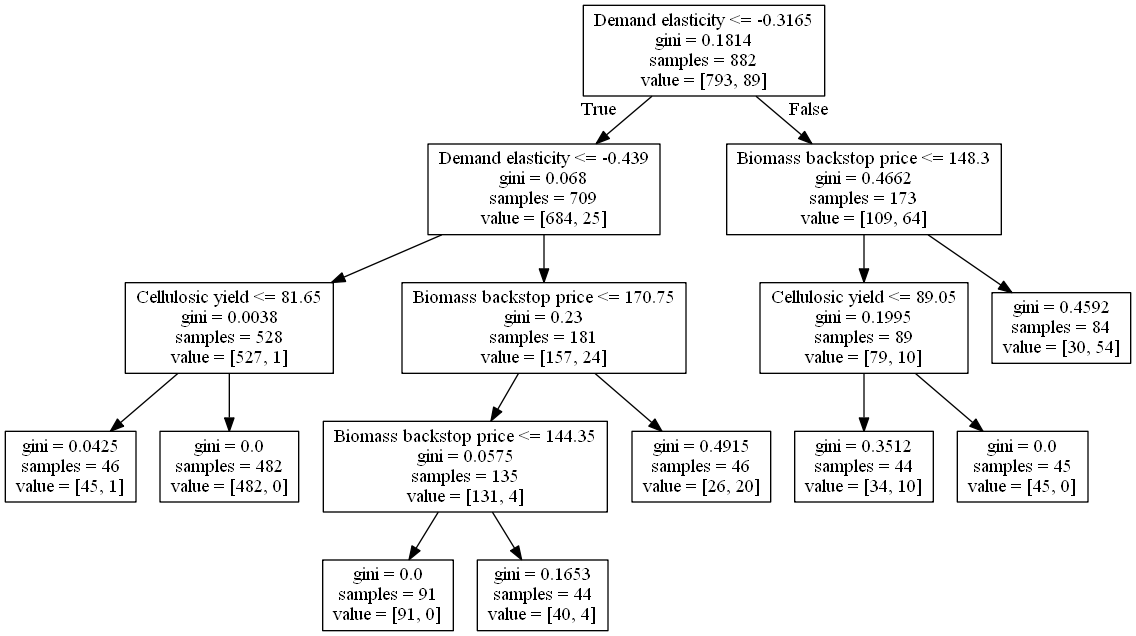

In [56]:
from IPython.display import Image
image = Image(cart_alg.show_tree())
image